# *FLORES ESTOPIER RODRIGO*

Button(description='Next Generation', icon='check', style=ButtonStyle(), tooltip='Next Generation')

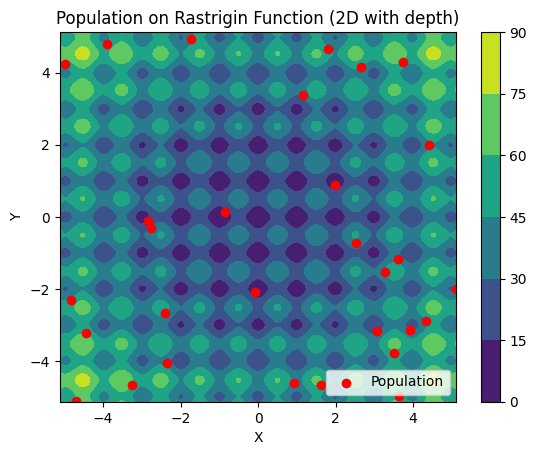

In [4]:
import ipywidgets as widgets

def create_button():
  button = widgets.Button(
    description='Next Generation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Next Generation',
    icon='check' # (FontAwesome names without the `fa-` prefix)
  )
  return button

import random
import matplotlib.pyplot as plt
import numpy as np
from IPython import display as display

from functools import cmp_to_key
#Chromosomes de 48 bits de longitud
L_chromosome=48    #16 bits para x ,16 bits para y, 16 bits para z
N_chains=2**(L_chromosome//3)
#Limites del espacio de busqueda
a=-5.12
b=5.12
crossover_point= L_chromosome//2


def random_chromosome():
    chromosome=[]
    for i in range(0,L_chromosome):
        if random.random()<0.5:
            chromosome.append(0)
        else:
            chromosome.append(1)

    return chromosome

#Number of chromosomes
N_chromosomes=30
#probability of mutation
prob_m=0.80

#Creamos la poblacion inicial
F0=[]
fitness_values=[]

for i in range(0,N_chromosomes):
    F0.append(random_chromosome())
    fitness_values.append(0)

#binary codification
def decode_chromosome(chromosome):
    global L_chromosome,N_chains,a,b
    third_length=L_chromosome//3
    # Decode the first third for x
    value_x = sum((2**p) * chromosome[-1-p] for p in range(third_length))
    x = a + (b - a) * float(value_x) / (N_chains - 1)

    # Decode the second third for y
    value_y = sum((2**p) * chromosome[third_length-1-p] for p in range(third_length))
    y = a + (b - a) * float(value_y) / (N_chains - 1)

    # Decode the last third for z
    value_z = sum((2**p) * chromosome[(2 * third_length) - 1 - p] for p in range(third_length))
    z = a + (b - a) * float(value_z) / (N_chains - 1)

    return x, y, z



# Rastrigin function in three dimensions f(x, y, z)
def rastrigin(x, y, z):
    return 10 * 3 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + (z**2 - 10 * np.cos(2 * np.pi * z))



def evaluate_chromosomes():
    global F0,fitness_values

    for p in range(N_chromosomes):
        x,y,z=decode_chromosome(F0[p])
        fitness_values[p]=rastrigin(x,y,z)


def compare_chromosomes(chromosome1,chromosome2):
    x1, y1,z1 = decode_chromosome(chromosome1)
    x2, y2,z2 = decode_chromosome(chromosome2)

    fvc1=rastrigin(x1,y1,z1)
    fvc2=rastrigin(x2,y2,z2)
    if fvc1 > fvc2:
        return 1
    elif fvc1 == fvc2:
        return 0
    else: #fvg1<fvg2
        return -1





def create_wheel():
    global F0,fitness_values
    Lwheel=N_chromosomes*10
    maxv=max(fitness_values)
    acc=0
    for p in range(N_chromosomes):
        acc+=maxv-fitness_values[p]
    fraction=[]
    for p in range(N_chromosomes):
        fraction.append( float(maxv-fitness_values[p])/acc)
        if fraction[-1]<=1.0/Lwheel:
            fraction[-1]=1.0/Lwheel
    #print(fraction)
    fraction[0]-=(sum(fraction)-1.0)/2
    fraction[1]-=(sum(fraction)-1.0)/2
    #print(fraction)

    wheel=[]

    pc=0

    for f in fraction:
        Np=int(f*Lwheel)
        for i in range(Np):
            wheel.append(pc)
        pc+=1

    return wheel

F1=F0[:]
n=0
def nextgeneration(b):
    global F0, F1, n
    display.clear_output(wait=True)
    #display.display(button)

    # Sort the population by fitness
    F0.sort(key=cmp_to_key(compare_chromosomes))

    print( "Best solution so far:")
    xx,yy,zz = decode_chromosome(F0[0])

    n +=1
    print("Generation: ", n)
    print("f",decode_chromosome(F0[0]),"= ", rastrigin(xx,yy,zz) )

    # Elitism: Keep the two best chromosomes
    F1[0] = F0[0]
    F1[1] = F0[1]

    # Create the rest of the new generation
    roulette = create_wheel()
    print(roulette)
    for i in range(0,int((N_chromosomes-2)/2)):
        #Seleccionamos dos padres
        p1 = random.choice(roulette)
        p2 = random.choice(roulette)

        # Generamos dos descendientes mediante crossover
        o1 = F0[p1][:crossover_point] + F0[p2][crossover_point:]
        o2 = F0[p2][:crossover_point] + F0[p1][crossover_point:]

        # Mutacion
        if random.random() < prob_m:
            o1[random.randint(0, L_chromosome - 1)] ^= 1
        if random.random() < prob_m:
            o2[random.randint(0, L_chromosome - 1)] ^= 1

        #Agregamos los descendientes a la siguiente generacion F1
        F1[2+2*i]=o1
        F1[3+2*i]=o2

    # Remplazamos la generacion
    F0[:] = F1[:]

    # Graph the current population
    #graph_population(F1)





# Graph the population and Rastrigin surface in 2D with color depth
def graph_population(F):
    x_population = []
    y_population = []
    z_population = []

    for chromosome in F:
        x, y, z = decode_chromosome(chromosome)
        x_population.append(x)
        y_population.append(y)
        z_population.append(z)

    fig, ax = plt.subplots()

    # Create grid for the surface
    x = np.linspace(a, b, 500)
    y = np.linspace(a, b, 500)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin(X, Y, np.zeros_like(X))  # 2D Rastrigin with z=0

    # Plot the surface as a 2D heatmap
    contour = ax.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(contour)

    # Scatter plot of the population points
    ax.scatter(x_population, y_population, color='red', label='Population')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Population on Rastrigin Function (2D with depth)')

    plt.legend()
    plt.show()



button=create_button()
button.on_click(nextgeneration)
display.display(button)

evaluate_chromosomes()
graph_population(F0)

Best solution so far:
Generation:  200
f (-7.812619211122751e-05, -7.812619211122751e-05, -7.812619211122751e-05) =  3.632778419415672e-06
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 

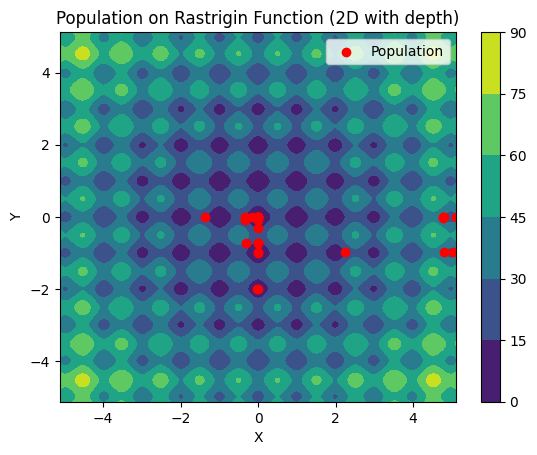

In [6]:
for generaciones in range(100):
    nextgeneration(None)
    evaluate_chromosomes()

#Graficar la ultima generacion
graph_population(F0)

